In [1]:
import laspy
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import numpy as np
from shapely.geometry import Point
import random
from sklearn.preprocessing import StandardScaler

In [3]:
las_file = laspy.read("data/SaintLouisLiDAR.laz")

data = {
    "X": las_file.X,
    "Y": las_file.Y,
    "Z": las_file.Z,
    "intensity": las_file.intensity,
    "return_number": np.asarray(las_file.return_number),
    "number_of_returns": np.asarray(las_file.number_of_returns),
    "red": las_file.red,
    "green": las_file.green,
    "blue": las_file.blue
}
df = pd.DataFrame(data)
print(df.head())
print(df[100:105])
print(df.isnull().sum())


len_data = len(las_file.points)

attributes_to_print = list(las_file.point_format.dimension_names)
attributes_to_print


# X,Y,Z, red, green, blue, intensity harici 0 tutmaktadır
# return_number ve number_of_returns 0 değil değişmektedir

        X       Y       Z  intensity  return_number  number_of_returns    red  \
0  911303  275080  160166      12592              2                  2  17664   
1  911981  275055  160212      12944              3                  3  15872   
2  912662  275031  160258      10848              3                  3  18432   
3  913355  275006  160283       8240              3                  3  17920   
4  914036  274981  160313      15968              1                  1  17408   

   green   blue  
0  23296  17920  
1  22016  15872  
2  25344  17408  
3  24064  17920  
4  22528  18432  
          X       Y       Z  intensity  return_number  number_of_returns  \
100  912105  274103  160263       5840              3                  3   
101  911411  274128  160285       8400              1                  1   
102  910717  274153  160261      12688              1                  1   
103  907750  274325  173391       1360              1                  2   
104  910040  274177  1602

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'synthetic',
 'key_point',
 'withheld',
 'overlap',
 'scanner_channel',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'user_data',
 'scan_angle',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'nir']

In [26]:
point = las_file.points[0]
print(f"X: {point.x}, Y: {point.y}, Z: {point.z}, Intensity: {point.intensity}, classification: {point.classification}, nir: {point.nir}, return_number: {point.return_number}, number_of_returns: {point.number_of_returns}, red: {point.red}, green: {point.green}, blue: {point.blue}")



X: <ScaledArrayView(729911.303)>, Y: <ScaledArrayView(4301275.08)>, Z: <ScaledArrayView(160.166)>, Intensity: 12592, classification: 0, nir: 0, return_number: <SubFieldView(2)>, number_of_returns: <SubFieldView(2)>, red: 17664, green: 23296, blue: 17920


In [27]:

def extract_data(point):
    return {
        "X": getattr(point, "X"),
        "Y": getattr(point, "Y"),
        "Z": getattr(point, "Z"),
        "intensity": getattr(point, "intensity"),
        "return_number": getattr(point, "return_number"),
        "number_of_returns": getattr(point, "number_of_returns"),
        "red": getattr(point, "red"),
        "green": getattr(point, "green"),
        "blue": getattr(point, "blue"),
    }




len_data = len(las_file.points)
points = las_file.points
for i in range(5):
    rand = random.randint(0, len_data)
    point = points[i]
    print(", ".join([f"{attr}: {getattr(point, attr)}" for attr in attributes_to_print]))


X: 911303, Y: 275080, Z: 160166, intensity: 12592, return_number: <SubFieldView(2)>, number_of_returns: <SubFieldView(2)>, synthetic: <SubFieldView(0)>, key_point: <SubFieldView(0)>, withheld: <SubFieldView(0)>, overlap: <SubFieldView(0)>, scanner_channel: <SubFieldView(0)>, scan_direction_flag: <SubFieldView(0)>, edge_of_flight_line: <SubFieldView(0)>, classification: 0, user_data: 0, scan_angle: 0, point_source_id: 0, gps_time: 0.0, red: 17664, green: 23296, blue: 17920, nir: 0
X: 911981, Y: 275055, Z: 160212, intensity: 12944, return_number: <SubFieldView(3)>, number_of_returns: <SubFieldView(3)>, synthetic: <SubFieldView(0)>, key_point: <SubFieldView(0)>, withheld: <SubFieldView(0)>, overlap: <SubFieldView(0)>, scanner_channel: <SubFieldView(0)>, scan_direction_flag: <SubFieldView(0)>, edge_of_flight_line: <SubFieldView(0)>, classification: 0, user_data: 0, scan_angle: 0, point_source_id: 0, gps_time: 0.0, red: 15872, green: 22016, blue: 15872, nir: 0
X: 912662, Y: 275031, Z: 16025

In [4]:
# X of shp to np array
x_values = df["X"]
x_values

0           911303
1           911981
2           912662
3           913355
4           914036
            ...   
9236512    2357675
9236513    2357281
9236514    2356901
9236515    2356525
9236516    2356162
Name: X, Length: 9236517, dtype: int32

In [5]:
# Y of shp to np array
# y_values = np.array([getattr(point, "Y") for point in points[:]])
y_values = df["Y"]
y_values

0           275080
1           275055
2           275031
3           275006
4           274981
            ...   
9236512    1739671
9236513    1739659
9236514    1739582
9236515    1739506
9236516    1739433
Name: Y, Length: 9236517, dtype: int32

In [16]:
print(len(points))
print(type(points))
print(type(points[0]))

9236517
<class 'laspy.point.record.ScaleAwarePointRecord'>
<class 'laspy.point.record.ScaleAwarePointRecord'>


In [17]:
print(points[0].X)

911303


     id                                           geometry
0  None  POLYGON ((-90.33490 38.84271, -90.33493 38.842...
1  None  POLYGON ((-90.33510 38.84293, -90.33516 38.842...
2  None  POLYGON ((-90.33615 38.84317, -90.33609 38.843...
3  None  POLYGON ((-90.33544 38.84298, -90.33556 38.843...
4  None  POLYGON ((-90.33579 38.84305, -90.33591 38.843...
<class 'geopandas.geodataframe.GeoDataFrame'>

Index(['id', 'geometry'], dtype='object')
[(-90.33627979371984, 38.8421272995463), (-90.3362934064191, 38.84205618565321), (-90.33639195723926, 38.842058434510484), (-90.33639787280558, 38.842095710253886), (-90.33640669291479, 38.84215305114397), (-90.33631855955265, 38.842165324925354), (-90.33627979371984, 38.8421272995463)]


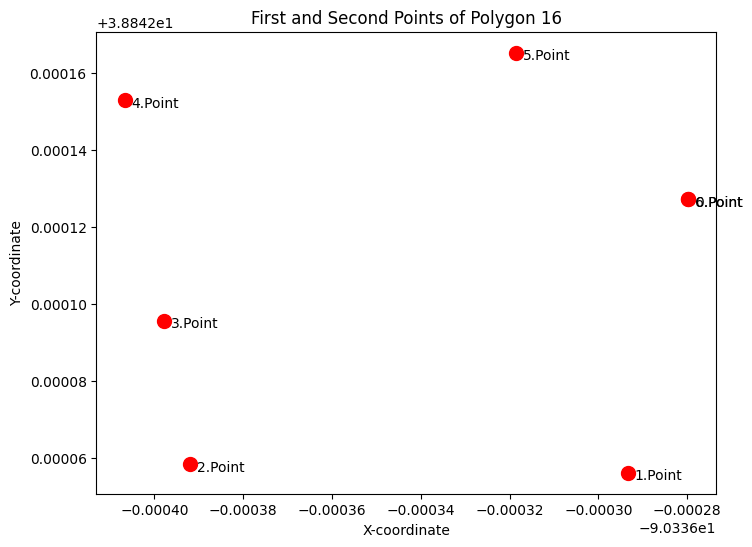

In [18]:

shape_file = gpd.read_file("data/SaintLouisTrees/SaintLouisTrees.shp")
print(shape_file.head())
print(type(shape_file))
print()

print(shape_file.columns)
shape_file.drop('id', axis=1, inplace=True)
list_16 = list(shape_file.loc[16, "geometry"].exterior.coords)
first_point_x, first_point_y = list_16[0]
second_point_x, second_point_y = list_16[1]
print(list_16)

# Create a plot
plt.figure(figsize=(8, 6))


for i in range(len(list_16)):
    plt.plot(list_16[i][0], list_16[i][1], 'o', color='red', markersize=10)
    plt.annotate(
        f"{i}." "Point",
        xy=(list_16[i][0], list_16[i][1]),
        xytext=(5, -5),
        textcoords='offset points',
    )


# Add labels and title
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("First and Second Points of Polygon 16")

# Show the plot
plt.show()



In [7]:
import cv2 as cv

ground_truth = cv.imread("data/SaintLouisTrees/SaintLouisTrees.png", cv.IMREAD_GRAYSCALE)
ret, thresh = cv.threshold(ground_truth, 127, 1, cv.THRESH_BINARY)
print(thresh.shape)
print(thresh[10][1500])
print(thresh[10][0])
print(ground_truth[10][1500])
print(ground_truth[10][0])


(3001, 3001)
1
0
220
0


In [8]:
ground_truth_size = ground_truth.shape[0]

las_min_x, las_max_x = las_file.X.min(), las_file.X.max()
las_min_y, las_max_y = las_file.Y.min(), las_file.Y.max()

print("min and max values of points in las file")
print(f"Min X: {las_min_x}, Max X: {las_max_x}, range: {(las_max_x - las_min_x)}")
print(f"Min Y: {las_min_y}, Max Y: {las_max_y}, range: {las_max_y - las_min_y}")

min and max values of points in las file
Min X: 885001, Max X: 2385000, range: 1499999
Min Y: 246001, Max Y: 1745999, range: 1499998


In [9]:
def get_row_pixel_index_of_point(point_y):
    pixel_range = (las_max_x - las_min_x) / ground_truth_size
    return int(ground_truth_size - ((point_y - las_min_y) // pixel_range) - 1)

def get_col_pixel_index_of_point(point_x):
    pixel_range = (las_max_y - las_min_y) / ground_truth_size
    return int(ground_truth_size - ((point_x - las_min_x) // pixel_range) - 1)

index = random.randint(0, len(df) - 1)

print((index))
print(f"number is : {df.loc[index, 'Y']}")
print(f"number is : {df['Y'][index]}")
print(get_row_pixel_index_of_point(df["Y"][0]))
print(get_col_pixel_index_of_point(df["Y"][len_data - 1]))
# df["is_tree"] = thresh[get_row_pixel_index_of_point(df["Y"])][get_col_pixel_index_of_point(df["X"])]
# df.head()

7152287
number is : 1102051
number is : 1102051
2942
1291


In [33]:
# Normalize LAS coordinates to match the range of the ground truth image
normalized_x = ((df.X - df.X.min()) / (df.X.max() - df.X.min()) * (ground_truth.shape[1] - 1)) 
normalized_y = ground_truth_size - ((df.Y - df.Y.min()) / (df.Y.max() - df.Y.min()) * (ground_truth.shape[0] - 1)) -1

print(normalized_x.max(), normalized_x.min())

# Round to the nearest integer to get pixel indices
pixel_indices_x = np.round(normalized_x).astype(int)
pixel_indices_y = np.round(normalized_y).astype(int)

print()
# print((pixel_indices_x[(df[df['X'] > 890000]['X'].min()) & (df.Y.min())]))
print()

print((pixel_indices_x[df.Y.min()]))
print(pixel_indices_x[:5])
print((pixel_indices_x.max(), pixel_indices_x.min()))
print((pixel_indices_y.max(), pixel_indices_y.min()))

# Map LAS points to ground truth values
df["is_tree"] = thresh[pixel_indices_y, pixel_indices_x]
print(df["is_tree"][278])
print(thresh[3000][10])


3000.0 0.0


111
0    53
1    54
2    55
3    57
4    58
Name: X, dtype: int32
(3000, 0)
(3000, 0)
1
1


In [34]:
df[['X', 'Y', 'Z', 'intensity', 'red', 'green', 'blue']] = StandardScaler().fit_transform(df[['X', 'Y', 'Z', 'intensity', 'red', 'green', 'blue']])
df.head()

,X,Y,Z,intensity,return_number,number_of_returns,red,green,blue,is_tree
0,-1.558264,-1.529600,-0.982553,0.186463,2,2,-0.477213,-0.385793,-0.495103,1
1,-1.556793,-1.529659,-0.979989,0.233199,3,3,-0.634608,-0.518331,-0.763794,1
2,-1.555314,-1.529717,-0.977424,-0.045091,3,3,-0.409758,-0.173731,-0.562276,1
3,-1.553810,-1.529776,-0.976031,-0.391360,3,3,-0.454728,-0.306270,-0.495103,1
4,-1.552332,-1.529836,-0.974358,0.634702,1,1,-0.499698,-0.465316,-0.427930,1


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df[['X', 'Y', 'Z', 'intensity','return_number', 'number_of_returns', 'red', 'green', 'blue']], df['is_tree'])
y_hat = knn.predict(df[['X', 'Y', 'Z', 'intensity','return_number', 'number_of_returns', 'red', 'green', 'blue']])
print(accuracy_score(df['is_tree'], y_hat))

0.988112510375935


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(df[['X', 'Y', 'Z', 'intensity','return_number', 'number_of_returns', 'red', 'green', 'blue']], df['is_tree'])
y_hat = svm.predict(df[['X', 'Y', 'Z', 'intensity','return_number', 'number_of_returns', 'red', 'green', 'blue']])
print(accuracy_score(df['is_tree'], y_hat))

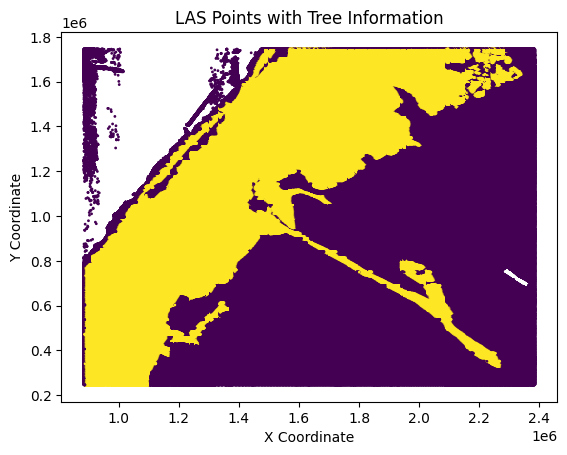

In [99]:
plt.scatter(df.X, df.Y, c=df.is_tree, cmap='viridis', s=1)  # Adjust the colormap as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("LAS Points with Tree Information")
plt.show()

In [45]:
# Map LAS coordinates to pixel coordinates
x_pixels = np.floor((df["X"] - las_min_x) / (las_max_x - las_min_x) * (ground_truth_size - ground_truth_size)).astype(int)
y_pixels = np.floor((df["Y"] - las_min_y) / (las_max_y - las_min_y) * (ground_truth_size - ground_truth_size)).astype(int)

# Filter points within the valid pixel range
valid_points_mask = np.logical_and.reduce([
    (x_pixels >= 0), (x_pixels < ground_truth_size),
    (y_pixels >= 0), (y_pixels < ground_truth_size)
])

# Extract pixel values corresponding to LAS points
pixel_values = ground_truth[y_pixels[valid_points_mask], x_pixels[valid_points_mask]]

# Now, 'pixel_values' contains the pixel values corresponding to LAS points

# Example: Print the first 10 pixel values
print(pixel_values[:10])

[0 0 0 0 0 0 0 0 0 0]


[(-90.33627979371984, 38.8421272995463), (-90.3362934064191, 38.84205618565321), (-90.33639195723926, 38.842058434510484), (-90.33639787280558, 38.842095710253886), (-90.33640669291479, 38.84215305114397), (-90.33631855955265, 38.842165324925354), (-90.33627979371984, 38.8421272995463)]
7
POLYGON ((-90.33627979371984 38.8421272995463, -90.3362934064191 38.84205618565321, -90.33639195723926 38.842058434510484, -90.33639787280558 38.842095710253886, -90.33640669291479 38.84215305114397, -90.33631855955265 38.842165324925354, -90.33627979371984 38.8421272995463))


<Axes: >

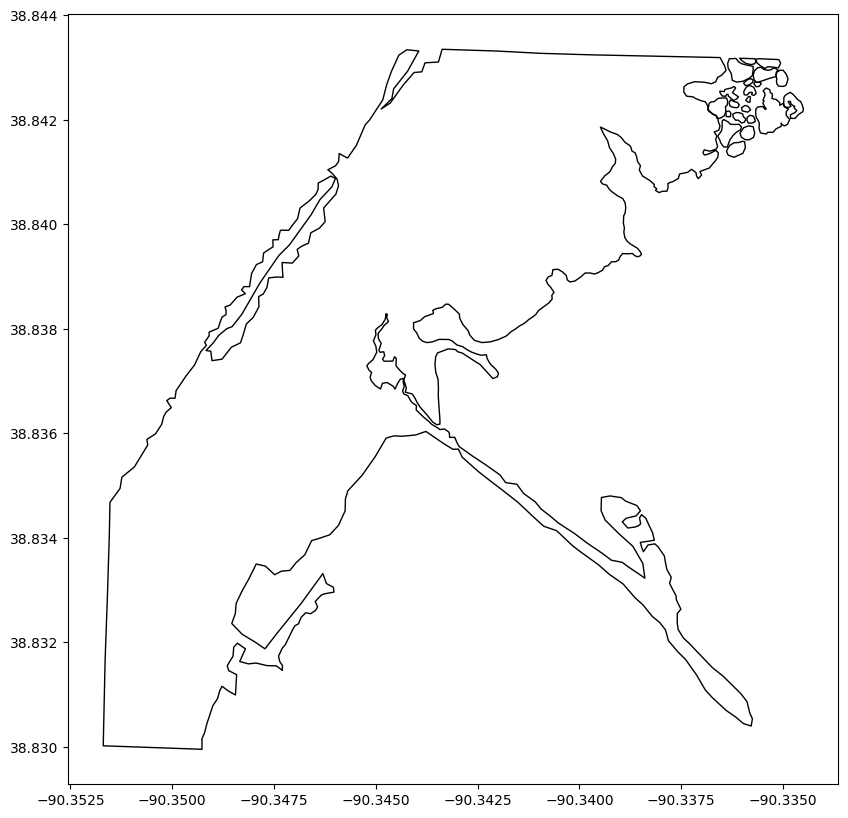

In [152]:
print(list(shape_file.loc[16, "geometry"].exterior.coords))
print(len(shape_file.loc[16, "geometry"].exterior.coords))
print(shape_file.loc[16, "geometry"])
shape_file.loc[16, "geometry"]
shape_file.plot(figsize=(10,10), edgecolor="k", facecolor="none") # color="green"

In [153]:
# geometry = [Point(getattr(point, "X"), getattr(point, "Y")) for point in points]
# print(type(geometry))


In [154]:
# # xy_points = pd.Series([Point(xy) for xy in zip(x_values, y_values)])
# xy_points = gpd.GeoSeries(df.apply(lambda row: Point(row['X'], row['Y']), axis=1))

In [155]:
# # Extract min and max values for x and y
# poly_min_x = shape_file.bounds['minx'].min()
# poly_max_x = shape_file.bounds['maxx'].max()
# poly_min_y = shape_file.bounds['miny'].min()
# poly_max_y = shape_file.bounds['maxy'].max()

# # Print or use the results
# print(f"Min X of polygons: {poly_min_x}, Max X of polygons: {poly_max_x}")
# print(f"Min Y of polygons: {poly_min_y}, Max Y of polygons: {poly_max_y}")

Min X of polygons: -90.35169481380083, Max X of polygons: -90.33449866539493
Min Y of polygons: 38.82995510977668, Max Y of polygons: 38.84334602660146


In [157]:
# print(f"ratio of las file is   {(las_max_y - las_min_y) / (las_max_x - las_min_x)}")
# print(f"ratio of shape file is {(poly_max_y - poly_min_y) / (poly_max_x - poly_min_x)}")

# # ratio_las_shape = (las_max_y - las_min_y) / (poly_max_y - poly_min_y)
# # poly_max_y *= ratio_las_shape
# # poly_min_y *= ratio_las_shape

# print(f"ratio of Ys {(las_max_y - las_min_y) / (poly_max_y - poly_min_y)}")
# # print(f"ratio of Xs {(las_max_x - las_min_x) / (scaled_shape_file.bounds['maxy'].max() - scaled_shape_file.bounds['miny'].min())}")

# # print(f"ratio of las file is   {(las_max_x - las_min_x) / (las_max_y - las_min_y)}")
# # print(f"ratio of shape file is {(poly_max_x - poly_min_x) / (poly_max_y - poly_min_y)}")

ratio of las file is   0.9999993333328889
ratio of shape file is 0.7787160536592752
ratio of Ys 112016079.22946365


# Scaling and Shifting shape file
ground truth max x frame in max x'ine eşit değil. doğru bir scale ve shift olmaz bu algoritma

         minx       miny       maxx       maxy
0  -90.335172  38.842635 -90.334878  38.842946
1  -90.335735  38.842713 -90.335103  38.843002
2  -90.336358  38.842718 -90.335732  38.843170
3  -90.335665  38.842977 -90.335058  38.843166
4  -90.336066  38.843053 -90.335667  38.843174
5  -90.334984  38.842023 -90.334499  38.842523
6  -90.335671  38.841725 -90.334835  38.842605
7  -90.335965  38.842463 -90.335659  38.842657
8  -90.335711  38.842630 -90.335532  38.842720
9  -90.335966  38.842653 -90.335734  38.842785
10 -90.336388  38.841280 -90.335925  38.841587
11 -90.336603  38.841475 -90.336019  38.842003
12 -90.335916  38.842334 -90.335801  38.842446
13 -90.336020  38.842144 -90.335795  38.842274
14 -90.336324  38.842227 -90.336073  38.842379
15 -90.336233  38.841936 -90.335912  38.842136
16 -90.336407  38.842056 -90.336280  38.842165
17 -90.335887  38.841935 -90.335679  38.842082
18 -90.336851  38.842021 -90.336359  38.842415
19 -90.336553  38.842366 -90.336093  38.842634
20 -90.336057

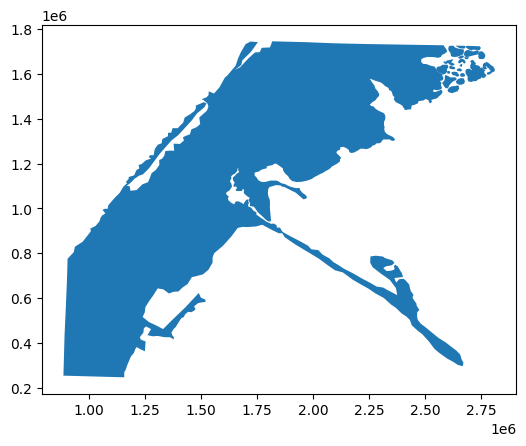

In [158]:
# scaled_shape_file = shape_file.copy()

# min_x_points, max_x_points = np.min(x_values), np.max(x_values)
# min_y_points, max_y_points = np.min(y_values), np.max(y_values)

# # Calculate the scaling factors
# # scale_factor_x = (max_x_points - min_x_points) / (shape_file.bounds['maxx'].max() - shape_file.bounds['minx'].min())
# # scale_factor_y = (max_y_points - min_y_points) / (shape_file.bounds['maxy'].max() - shape_file.bounds['miny'].min())




# scale_factor = (max_y_points - min_y_points) / (shape_file.bounds['maxy'].max() - shape_file.bounds['miny'].min())

# # Apply scaling to shape_file
# scaled_shape_file['geometry'] = scaled_shape_file['geometry'].translate(xoff=-scaled_shape_file.bounds['minx'].min(), yoff=-scaled_shape_file.bounds['miny'].min())
# scaled_shape_file['geometry'] = scaled_shape_file['geometry'].scale(xfact=scale_factor, yfact=scale_factor, origin=(0, 0))

# # Translate back to the desired range of points
# scaled_shape_file['geometry'] = scaled_shape_file['geometry'].translate(xoff=min_x_points, yoff=min_y_points)

# # Verify the result
# print(shape_file.bounds)




# # print(type(scaled_shape_file['geometry']))
# # scaled_shape_file['geometry'] = scaled_shape_file['geometry'].translate(xoff=-poly_min_x + 885001, yoff=-poly_min_y + 246001)

# # # Scale X and Y coordinates
# # x_scale_factor = (2385000 - 885001) / (scaled_shape_file.bounds['maxx'].max() - scaled_shape_file.bounds['minx'].min())
# # y_scale_factor = (1745999 - 246001) / (scaled_shape_file.bounds['maxy'].max() - scaled_shape_file.bounds['miny'].min())

# # scaled_shape_file['geometry'] = scaled_shape_file['geometry'].scale(xfact=x_scale_factor, yfact=y_scale_factor, origin=(0, 0))




# # Verify the changes
# print(scaled_shape_file.head())

# print(scaled_shape_file.loc[16, "geometry"])
# # shape_file.plot(figsize=(10,10),edgecolor="k", facecolor="none") # color="green"
# fig, ax = plt.subplots()
# scaled_shape_file.plot(ax=ax, aspect='equal')
# plt.show()

In [159]:
# # Extract min and max values for x and y
# poly_min_x = scaled_shape_file.bounds['minx'].min()
# poly_max_x = scaled_shape_file.bounds['maxx'].max()
# poly_min_y = scaled_shape_file.bounds['miny'].min()
# poly_max_y = scaled_shape_file.bounds['maxy'].max()

# # Print or use the results
# print(f"Min X of polygons: {poly_min_x}, Max X of polygons: {poly_max_x}")
# print(f"Min Y of polygons: {poly_min_y}, Max Y of polygons: {poly_max_y}")

Min X of polygons: 885001.0, Max X of polygons: 2811246.1222770344
Min Y of polygons: 246001.0, Max Y of polygons: 1745999.0


Created random 50 point and found inside or outside the Ground Truth

In [160]:
# random_indices = random.sample(range(len_data), 50)

# random_points = [xy_points[index] for index in random_indices]
# random_points_gdf = gpd.GeoDataFrame(geometry=random_points)

# for i in range(50):
#     random_points_gdf.at[i,"inside_polygon"] = any(xy_points[random_indices[i]].within(poly) for poly in scaled_shape_file['geometry'])
#     print(f"Point {xy_points[random_indices[i]]} in {random_indices[i]}.index: {any(xy_points[random_indices[i]].within(poly) for poly in scaled_shape_file['geometry'])}")

# print(type(random_points_gdf.loc[0, "inside_polygon"]))
# random_points_gdf['inside_polygon'] = random_points_gdf["inside_polygon"].astype('int32')
# print(random_points_gdf.dtypes)
# # label = xy_points[:5].apply(lambda point: any(point.within(poly) for poly in shape_file["geometry"]))


Point POINT (2007699 706619) in 4368960.index: False
Point POINT (1698900 827773) in 4502643.index: False
Point POINT (1663323 1690659) in 8571293.index: False
Point POINT (1288864 814699) in 2901529.index: True
Point POINT (923986 249799) in 13688.index: False
Point POINT (1193947 1270434) in 6232561.index: False
Point POINT (1526174 751838) in 3246485.index: True
Point POINT (2378642 898932) in 5383554.index: False
Point POINT (2343870 1051091) in 7947262.index: False
Point POINT (1107438 536284) in 1206798.index: True
Point POINT (2074567 1185721) in 7235931.index: True
Point POINT (1162360 751894) in 2667400.index: True
Point POINT (938567 718802) in 1355652.index: True
Point POINT (1574145 370942) in 1018079.index: False
Point POINT (2133680 508995) in 4266921.index: False
Point POINT (2225774 401453) in 3904042.index: False
Point POINT (2342781 1495634) in 8413523.index: False
Point POINT (1824595 389753) in 3503659.index: False
Point POINT (1401152 1335478) in 6479206.index: Tru

Plot the selected 50 points and define them inside or outside

Point POINT (2007699 706619) in 4368960.index: Outside
Point POINT (1698900 827773) in 4502643.index: Outside
Point POINT (1663323 1690659) in 8571293.index: Outside
Point POINT (1288864 814699) in 2901529.index: Inside
Point POINT (923986 249799) in 13688.index: Outside
Point POINT (1193947 1270434) in 6232561.index: Outside
Point POINT (1526174 751838) in 3246485.index: Inside
Point POINT (2378642 898932) in 5383554.index: Outside
Point POINT (2343870 1051091) in 7947262.index: Outside
Point POINT (1107438 536284) in 1206798.index: Inside
Point POINT (2074567 1185721) in 7235931.index: Inside
Point POINT (1162360 751894) in 2667400.index: Inside
Point POINT (938567 718802) in 1355652.index: Inside
Point POINT (1574145 370942) in 1018079.index: Outside
Point POINT (2133680 508995) in 4266921.index: Outside
Point POINT (2225774 401453) in 3904042.index: Outside
Point POINT (2342781 1495634) in 8413523.index: Outside
Point POINT (1824595 389753) in 3503659.index: Outside
Point POINT (14

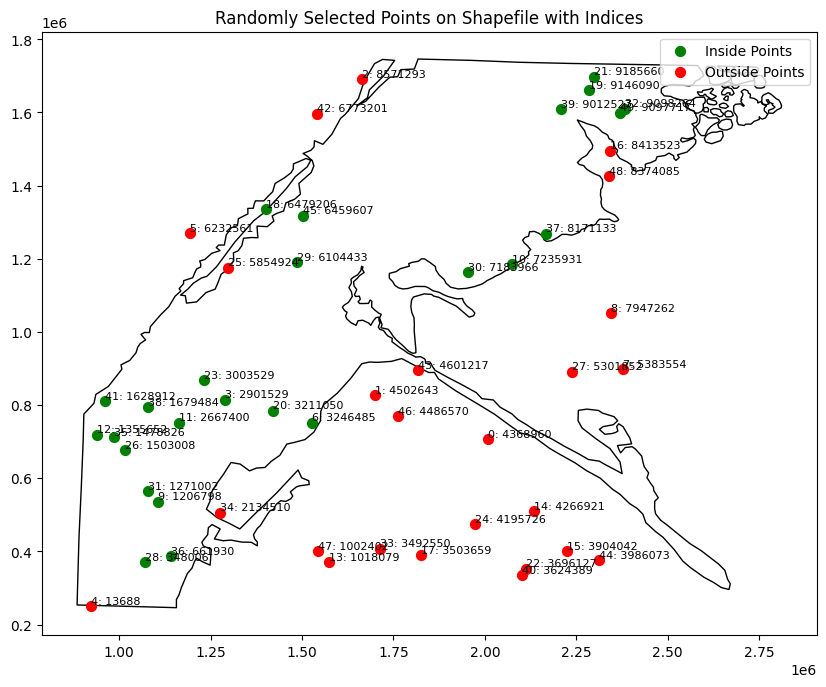

In [161]:

# # Build a spatial index for the shapefile
# sindex = scaled_shape_file.sindex

# # Find indices of points near each random point
# nearby_point_indices = []
# for random_point in random_points_gdf['geometry']:
#     possible_matches_index = list(sindex.intersection(random_point.bounds))
#     possible_matches = scaled_shape_file.iloc[possible_matches_index]
#     nearest_point_index = possible_matches[possible_matches.intersects(random_point)].index
#     nearby_point_indices.append(nearest_point_index)

# # # Create a new column in random_points_gdf to indicate whether the points are inside or outside
# # random_points_gdf['inside_polygon'] = [any(index in indices for indices in nearby_point_indices) for index in random_points_gdf.index]

# # Print whether each point is inside or outside the polygons
# for i, rand in enumerate(random_indices):
#     is_inside = random_points_gdf.loc[i, 'inside_polygon']
#     print(f"Point {xy_points[rand]} in {rand}.index: {'Inside' if is_inside else 'Outside'}")

# # Plot the shapefile
# fig, ax = plt.subplots(figsize=(10, 10))
# scaled_shape_file.plot(ax=ax, edgecolor='black', facecolor='none', aspect="equal")

# # Plot the randomly selected points
# random_points_gdf[random_points_gdf['inside_polygon'] == True].plot(ax=ax, color='green', marker='o', markersize=50, label='Inside Points')
# random_points_gdf[random_points_gdf['inside_polygon'] == False].plot(ax=ax, color='red', marker='o', markersize=50, label='Outside Points')

# lower_left_corner = df[(df['X'] == df['X'].min()) & (df['Y'] == df['Y'].min())]

# # plt.plot(df[df["X"] == df["X"].max() and df["Y"] == df["Y"].min(), "X"], df[df['X'] == df["X"].max() and df["Y"] == df["Y"].min(),'Y'], marker="o", color="blue")
# plt.plot(lower_left_corner["X"], lower_left_corner["Y"], marker="o", color="blue", markersize=50)
# print(f"X: {df['X'].min()} Y: {df['Y'].min()}")


# # Annotate the points with their indices
# for i, point in enumerate(random_points_gdf['geometry']):
#     ax.text(point.x, point.y, f"{i}: {random_indices[i]}", fontsize=8, ha='left', va='bottom')

# # Add labels or legends if needed
# plt.title('Randomly Selected Points on Shapefile with Indices')
# plt.legend()

# # Show the plot
# plt.show()

Point POINT (1186790 1221198) in 5808351.index: Outside ??


False
POLYGON ((2582299.6044392902 1728243.8309200145, 2588868.6189594534 1717853.0494214967, 2594330.313419409 1710687.8103494449, 2598458.0259791724 1700672.7589038196, 2586207.202635642 1690391.3859956483, 2574976.936753427 1685527.1880037517, 2570133.469233499 1676356.8939895013, 2558109.3575849244 1672150.8496493683, 2538182.277494247 1675485.7374675767, 2511209.0401756014 1676421.1125808267, 2492210.382519243 1671734.054362728, 2482567.9581071483 1665553.4442340145, 2482150.574571984 1654361.988866343, 2490005.888247239 1645542.0542874807, 2508357.0920254234 1643843.3288739468, 2514370.795271588 1640505.864449712, 2530149.524444988 1635665.513992395, 2541526.152148635 1633485.7999387898, 2545038.940246609 1628925.26697824, 2547733.99758914 1624383.389596321, 2548769.743749951 1619239.3132506562, 2549083.1848888663 1616671.9391623088, 2559030.412913218 1609084.348245298, 2568688.044584119 1604703.6361062683, 2576626.71550391 1598121.9437526534, 2576797.0020006937 1591717.501100027

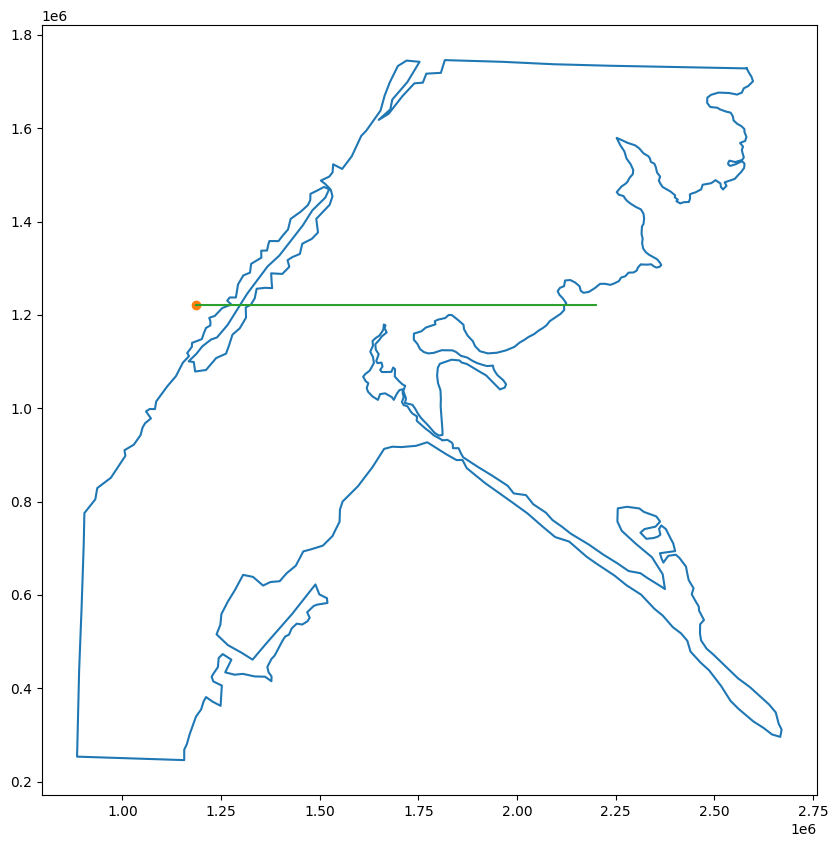

In [162]:
# print(xy_points[5808351].within(scaled_shape_file.loc[21, "geometry"]))
# print(scaled_shape_file.loc[21, "geometry"])
# # Plot the shapefile
# fig, ax = plt.subplots(figsize=(10, 10))
# x, y = scaled_shape_file.loc[21,"geometry"].exterior.xy
# plt.plot(x,y)
# plt.plot(xy_points[5808351].x, xy_points[5808351].y, marker="o")
# x = np.linspace(int(xy_points[5808351].x), 2200000, 2200000 - int(xy_points[5808351].x))
# y = np.full((len(x)), xy_points[5808351].y)
# plt.plot(x, y)
# plt.show()


Checked the corner of polygons is defined inside or outside

In [163]:
poly = shape_file.loc[16, "geometry"]
print(Point(-90.3362934064191, 38.84205618565321).within(poly))

False


In [164]:
# import sys
# !{sys.executable} -m pip install tifffile

# !pip install tifffile

import tifffile as tiff

tiff_file = tiff.imread("data/SaintLouisDSM/SaintLouisDSM.tif")

print(tiff_file.shape)
print(tiff_file.dtype)
print(tiff_file)

(3001, 3001)
float64
[[139.15854766 135.81457901 132.36681998 ... 194.51821059 194.4989433
  194.48062445]
 [138.68051944 135.66003951 133.2489267  ... 194.49901649 194.48197901
  194.46528658]
 [137.15082549 136.90386637 136.46385294 ... 194.48268084 194.46345081
  194.44650645]
 ...
 [162.57458018 161.23486809 163.10670174 ... 165.43757959 165.44753687
  165.43735788]
 [162.85554595 162.25787571 165.19837196 ... 165.42751232 165.43001227
  165.42396223]
 [163.22392283 163.59596731 164.37153015 ... 165.42083752 165.4235957
  165.41799561]]


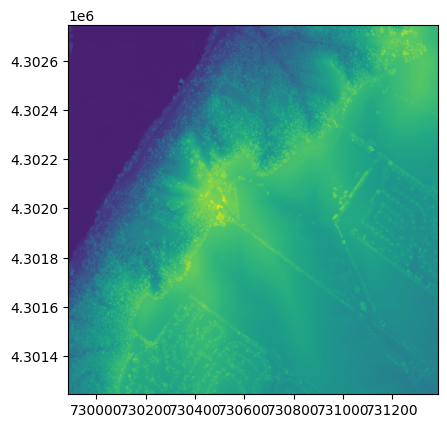

3001 3001
<class 'rasterio.io.DatasetReader'>
BoundingBox(left=729884.7509765625, bottom=4301245.7490234375, right=731385.2509765625, top=4302746.2490234375)
| 0.50, 0.00, 729884.75|
| 0.00,-0.50, 4302746.25|
| 0.00, 0.00, 1.00|
(729884.7509765625, 4302746.2490234375)
(731385.2509765625, 4301245.7490234375)
(3001, 3001)
139.1585476576944


In [165]:

tif_file = rasterio.open("data/SaintLouisDSM/SaintLouisDSM.tif")
show(tif_file)
print(tif_file.width, tif_file.height)
print(type(tif_file))
print(tif_file.bounds)
print(tif_file.transform)
print(tif_file.transform * (0,0))
print(tif_file.transform * (tif_file.width, tif_file.height))
print(tif_file.read(1).shape) # returns numpy array
print(tif_file.read(1)[0,0])